# AFFLUENT FILMS AT BOX OFFICE : CASE STUDY MICROSOFT


## 1. Business Understanding

Microsoft is  a technology corporation best known for software products such as Windows operating system. The company would like to create a movie studio due to the trending original video creation. In order to do this,the company needs to know the type of films that they should create. 

This project will extract the relevant data and provide a better insight on filming by providing meaningfull visualizations. It will also recommend on the type of films the head of Microsoft's new movie studio should venture into.The recommendation of films will be based on their rating and profits gained. The project will also help determine the most appropriate budget for filming and the most appropirate duration of films.

## 2.Data Understanding

The data used in this project was extracted from [IMDb](https://www.imdb.com/) ,[Box Office Mojo](https://www.boxofficemojo.com/) and [The Numbers](https://www.the-numbers.com/)
The dataset from Box Office Mojo contains the gross income of each movie,both domestic and foreign and the year it was released. This helps in determining the income generated from each movie. 

The IMDb website contained multiple datasets. The following datasets were extracted:
- title and ratings dataset : This dataset contains the code names of movies their rating and number of people who voted. It can be of use to determine whether a certain film was popular(loved) or hated.

- title and basics dataset : This dataset contains the names and code names of movies and their genres. 

The dataset extracted from [The Numbers](https://www.the-numbers.com/) website contains the names of movies and their associated budgets as well as the domestic and worldwide gross.This dataset will help determine losses associated with each film as well as the profits.

The project will use these datasets to come up with insights and relevant recommendations.

##  3.Data preparation

### Importing the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

### Loading and exploring the various data sets

In [2]:
# Loading the box office mojo datasets
bom_data_set = pd.read_csv('bom.movie_gross.csv.gz')
bom_data_set.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# loading the imdb title and basics dataset
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# Loading the imdb title and ratings dataset
ratings_df= pd.read_csv('imdb.title.ratings.csv.gz')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
#Loading the dataset from The Numbers
numbers_df = pd.read_csv('tn.movie_budgets.csv.gz')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Checking for missing values and duplicates in each dataset

In [6]:
# Determining whether bom dataset has missing values 
bom_data_set.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

It can be seen that the column 'studio' 5 missing values,'foreign_gross' column has 1350 missing values and 'domestic_gross' has 28 missing values. 

In [7]:
# CHecking the shape of the data set to determine the number of rows(length of the data set)
bom_data_set.shape

(3387, 5)

In [8]:
# checking the percentage of missing values in the 'domestic_gross' column
miss = bom_data_set['foreign_gross'].isna().sum() # calculates the number of missing values in the column
total_rows = len(bom_data_set)  # length ot the series
miss_p = (miss/total_rows)* 100 # percentage of missing values
miss_p

39.85828166519043

The number of missing values in the bom dataset is too high to be dropped. However the numbers_df containing the dataset from The Numbers contains almost similar information.

In [9]:
# Exploring the numbers_df for missing values
numbers_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset contains no missing values

In [10]:
# Exploring the data types in the numbers_df 
numbers_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

The data types are as anticipated.

In [11]:
# Checking for duplicates in the numbers_df dataset
# setting the subsets to release_date and movies.. a movie might have the same name but different release dates
numbers_df.duplicated(subset = ['release_date','movie']).sum() 

0

The numbers_df dataset has no duplicates.

In [12]:
# Checking whether the ratings_df has missing values
ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

The dataset has no missing values

In [13]:
# Checking the data types in the ratings_df
ratings_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

The data types are as expected..numeric

In [14]:
# checking for duplicates
# Subset is set to tconst i.e title ids
ratings_df.duplicated(subset = 'tconst').sum()

0

The ratings_df has no duplicates

In [15]:
# Checking for missing values the title_basics dataset
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [16]:
# checking the shape of the title_basics dataset
title_basics.shape

(146144, 6)

The 'runtime_minutes' column contains the highest number of missing values. Dropping this column might limit the scope of our research. It would be wise to replace the missing values in the dataset with a measure of central tendecy. We will use the median since it is least affected by outliers

In [17]:
# Replacing null run_rime rows in the title_basics dataframe with the median
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(),inplace = True)
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

The remaining missing rows with missing values in the title_basics dataframe can be dropped..They do not form a large part of the dataset.

In [18]:
title_basics.dropna(inplace = True)
title_basics.isna().sum() # Checking for missing values to confirm

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [19]:
title_basics.shape # Checking the shape of the dataframe

(140734, 6)

In [20]:
# checking for duplicates in the title_basics dataset
# Setting the subset to tconst...title ids should be unique
title_basics.duplicated(subset = 'tconst').sum()

0

The title_basics dataset contains no duplicates

In [21]:
# Checking the data types of the title_basics dataset
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

The data types are as expected

### Checking for placeholders 

We will observe the descriptive statistics of the various datasets...most place holders are ususally values that are peculiar in a dataset for instance having an year as 2500.

In [22]:
# Checking for placeholders in title_basics dataset
title_basics.describe()

,start_year,runtime_minutes
count,140734.000000,140734.000000
mean,2014.613945,86.246507
std,2.735566,149.934119
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.187247
75%,2017.000000,95.000000
max,2115.000000,51420.000000


The start_year has a maximum value of 2115..This is not normal since we are not even in that century. It can also be observed that the minimum and maximum runtime_minutes are 1 and 51420. It is wise to research further on the movies containing these runtime_minutes. 
- Dealing with the start_year column:

In [23]:
# Checking the title_basics to see what start_year represents
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


From the IMDb website [here](https://www.imdb.com/title/tt0063540/releaseinfo/) it can be seen that the movie Sunghursh was released to the internet in the year 2013...therefore,the start year represents the release date

In [24]:
# Sorting the values in descending order and observing the data manually
title_basics['start_year'].sort_values(ascending = False).head(50)

89506     2115
96592     2027
2949      2026
52213     2025
105187    2024
16337     2023
106865    2023
2483      2023
130618    2022
130616    2022
948       2022
2765      2022
821       2022
112960    2022
82608     2022
4451      2022
4903      2022
144423    2022
2465      2022
5340      2022
134557    2022
113854    2022
4382      2022
129337    2022
3008      2022
61851     2022
105186    2022
141435    2022
1330      2022
143910    2022
138515    2022
72206     2021
3145      2021
4115      2021
115153    2021
129910    2021
82851     2021
5654      2021
3613      2021
3710      2021
4740      2021
93        2021
3850      2021
3848      2021
3144      2021
3652      2021
3526      2021
3724      2021
111225    2021
4645      2021
Name: start_year, dtype: int64

In [25]:
# Filtering the data to remain with normal start_year....from 2023 and below 
title_basics['start_year'] = title_basics['start_year'].loc[title_basics['start_year']<= 2023]
title_basics.describe() # Exploring the descriptive statistics

,start_year,runtime_minutes
count,140729.000000,140734.000000
mean,2014.612923,86.246507
std,2.721869,149.934119
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.187247
75%,2017.000000,95.000000
max,2023.000000,51420.000000


- Dealing with the column 'runtime_minutes'

In [26]:
title_basics.loc[title_basics['runtime_minutes']==1].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019.0,1.0,Animation
3298,tt10326116,Happy New Year,Happy New Year,2019.0,1.0,Animation
22903,tt1935926,Tierra,Tierra,2010.0,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,Guerreiros da paz e poesia: It All Depends on Us,2013.0,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,Shark Sanctuary,2012.0,1.0,"Adventure,Documentary"


Taking the movie 'Lamentation For Little Girls Who Are In Love With Unobtanium' from the primary title and researching on its length from [IMDb](https://www.imdb.com/title/tt10265824/) it can be confirmed that the length is just one minute.

In [27]:
# Investigating the movie with the highest runtime as seen above
title_basics.loc[title_basics['runtime_minutes']==51420].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
132389,tt8273150,Logistics,Logistics,2012.0,51420.0,Documentary


The movie is a documentary and its length increases as more episodes are produced. The data is therefore valid

In [28]:
# Dealing with ratings_df
ratings_df.describe().round()

,averagerating,numvotes
count,73856.0,73856.0
mean,6.0,3524.0
std,1.0,30294.0
min,1.0,5.0
25%,6.0,14.0
50%,6.0,49.0
75%,7.0,282.0
max,10.0,1841066.0


Everything is as expected 

In [29]:
# Dealing numbers_df
numbers_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Everything is as expected...the id  column wont be of use in this project.

###  Note on outliers

- The outliers in these datasets are true outliers...that is,they form part of the natural variation. For instance the runtime_minutes of 51420 from the title_basics dataset. The datasets can now be used for analysis.

Taking another look at the numbers_df

In [30]:
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
# Converting the release_date column to  datetime object 
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


###  4.Data analysis

The data has been cleaned at can be used to provide insights and visualizations to Microsoft.
To start off we will take a look at the numbers_df,its columns and come up with the appropriate analysis and visualisations

In [32]:
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The columns domestic_gross and worldwide_gross can be added together to form total gross and the production_budget can be used to calculate the overall profit from the dataset...i.e profit = Total gross - production budget
-  To perform mathematical operations we will have to convert the money labelled with the dollar sign into integer type. To do this we will remove the commas and the dollar sign and convert the data into an integer type

In [33]:
numbers_df[['production_budget','domestic_gross','worldwide_gross']]= numbers_df[['production_budget','domestic_gross','worldwide_gross']].applymap(lambda x: int(x.replace('$','').replace(',','')))

In [34]:
# Exploring the data types in numbers_df dataset
numbers_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [35]:
# The datatypes can now be used for mathematical computations
# The column 'worldwide_gross' represents international earnings...as stasted from The Numbers website
# Adding a new column Profits
numbers_df['Profits'] = (numbers_df['domestic_gross']+numbers_df['worldwide_gross']) - numbers_df['production_budget']
numbers_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2426949682
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,972840850
8,9,2017-11-17,Justice League,300000000,229024295,655945209,584969504
9,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098


In [36]:
# Modyfying the release_date to only remain with the year
numbers_df['release_date'] =numbers_df['release_date'].dt.year
# Renaming the column 'release_date' to 'release_year'
numbers_df.rename(columns ={'release_date':'release_year'},inplace = True)
numbers_df.head()

,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


### Determining which films had the highest rating on imdb

The genres of films come in different forms for instance comedy,drama and (action comedy). This information on genres is contained in the title_basics dataset obtained from [IMDb](https://www.imdb.com/).To obtain which films have the highest rating we will join this dataframe with the ratings_df also obtained from [IMDb](https://www.imdb.com/)

In [37]:
# Exploring the two dataframes to see their columns
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.000000,"Comedy,Drama,Fantasy"


In [38]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
# Both datasets have a column tconst
# Joining the two dataframes..(title_basics and ratings_df)
title_n_ratings = ratings_df.merge(title_basics,on = 'tconst',how = 'inner')
title_n_ratings.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019.0,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010.0,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller"


The two dataframes have been merged.In order to identify whuch films(genres) have the highest rating we need to group the merged dataframe by genres and associate each genre with the mean of the average rating.

In [40]:
grouped_tr = title_n_ratings.groupby('genres').agg('mean')
grouped_tr.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_20304\1891333597.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_tr = title_n_ratings.groupby('genres').agg('mean')


,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.757712,336.115424,2014.271706,98.717375
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,78.593624
"Action,Adventure",5.223529,1603.102941,2014.205882,103.663581
"Action,Adventure,Animation",6.562874,21380.497006,2014.676647,92.614882
"Action,Adventure,Biography",7.061905,47604.809524,2015.047619,102.741035


In [41]:
# Sorting the values using the 'averagerating' column and accessing the top ten
top_ratings = grouped_tr.sort_values(by = 'averagerating',ascending = False)[:10]
top_ratings

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.000000
"Documentary,Family,Musical",9.3,19.0,2017.0,59.000000
"History,Sport",9.2,5.0,2016.0,86.187247
"Music,Mystery",9.0,5.0,2012.0,86.187247
Game-Show,9.0,7.0,2013.0,130.000000
"Drama,Fantasy,War",8.8,22.0,2016.0,86.187247
"Documentary,News,Sport",8.8,25.0,2017.0,85.000000
"Comedy,Drama,Reality-TV",8.8,15.0,2016.0,86.187247
"Drama,Short",8.8,8.0,2018.0,18.000000


The dataset above (top_ratings) has one problem..the genres with the highest rating are associated with a very small number of votes. It is wise to make decisions based on a higher number of votes. Lets use where the number of votes was above 1000.

In [42]:
# Filtering the grouped_tr to have the genres with more than a thousand votes.
grouped_trh = grouped_tr.loc[grouped_tr['numvotes']>1000]
# Sorting the values accessing the top 10
grouped_trh = grouped_trh.sort_values(by = 'averagerating',ascending = False)[:10]
grouped_trh = grouped_trh.reset_index()
grouped_trh.head()

,genres,averagerating,numvotes,start_year,runtime_minutes
0,"Animation,Documentary,Mystery",8.200000,1014.000000,2017.000000,93.000000
1,"Animation,Crime,Documentary",8.066667,2198.000000,2013.000000,74.666667
2,"Documentary,Sport,Thriller",7.900000,28979.000000,2017.000000,120.000000
3,"Biography,Documentary,Thriller",7.766667,16378.666667,2015.333333,100.333333
4,"Action,Documentary",7.711111,1453.333333,2014.000000,83.444444


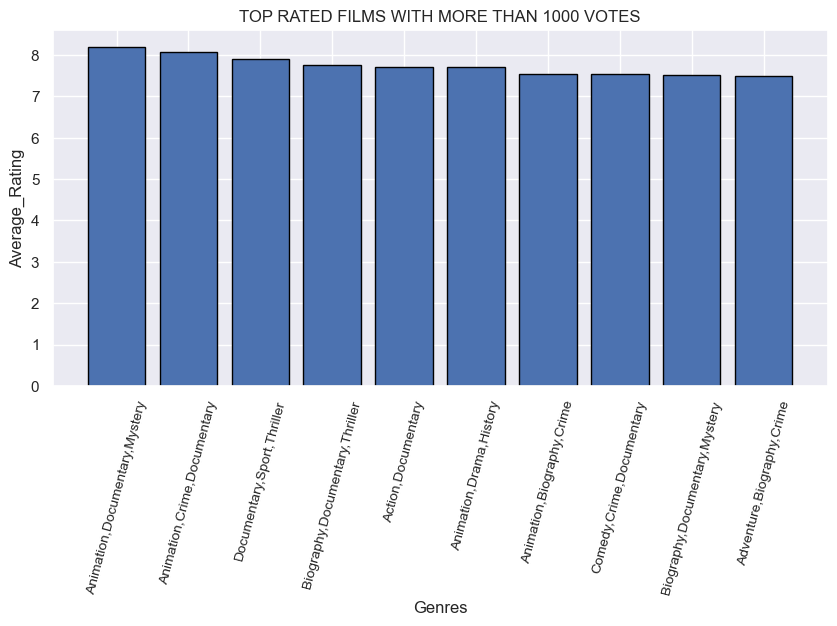

In [43]:
# Creating a bargraph from the above dataset
fig,ax = plt.subplots(figsize =(10,4))
lt = np.arange(len(grouped_trh))
ax.bar(grouped_trh['genres'],grouped_trh['averagerating'],edgecolor = 'Black')
ax.set_title('TOP RATED FILMS WITH MORE THAN 1000 VOTES')
ax.set_xlabel('Genres')
ax.set_ylabel('Average_Rating')
ax.set_xticks(lt,grouped_trh['genres'],rotation=75,fontsize = 10)
plt.subplots_adjust(bottom=0.1, top=0.99);

In [44]:
# Creating a table of genres and their respective rating
top_10_ratings = grouped_trh[['genres','averagerating']]
top_10_ratings

,genres,averagerating
0,"Animation,Documentary,Mystery",8.200000
1,"Animation,Crime,Documentary",8.066667
2,"Documentary,Sport,Thriller",7.900000
3,"Biography,Documentary,Thriller",7.766667
4,"Action,Documentary",7.711111
5,"Animation,Drama,History",7.700000
6,"Animation,Biography,Crime",7.550000
7,"Comedy,Crime,Documentary",7.533333
8,"Biography,Documentary,Mystery",7.520000
9,"Adventure,Biography,Crime",7.500000


Films with animation,documentary and mystery had the highest average rating.
It is also noticeable that most films related to documentary occur the most in the table above.This can also be visualised.

In [45]:
# Creating a table that contains only documentary in genres related to it.
top_10_ratings['genres']= top_10_ratings['genres'].map(lambda x:'Documentary' if 'Documentary' in x else x)
top_10_ratings

C:\Users\hp\AppData\Local\Temp\ipykernel_20304\909401518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_ratings['genres']= top_10_ratings['genres'].map(lambda x:'Documentary' if 'Documentary' in x else x)


,genres,averagerating
0,Documentary,8.200000
1,Documentary,8.066667
2,Documentary,7.900000
3,Documentary,7.766667
4,Documentary,7.711111
5,"Animation,Drama,History",7.700000
6,"Animation,Biography,Crime",7.550000
7,Documentary,7.533333
8,Documentary,7.520000
9,"Adventure,Biography,Crime",7.500000


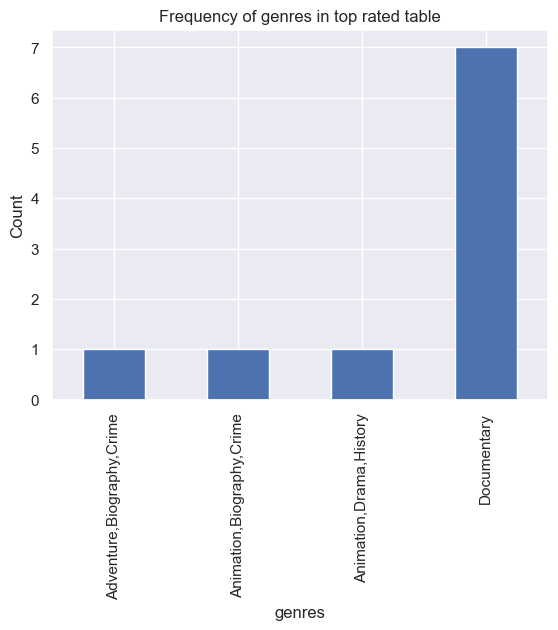

In [46]:
# Grouping the dataset
grouped_top10 = top_10_ratings.groupby('genres').count()
# Creating a bar graph to show the frequency
grouped_top10.plot(kind ='bar',xlabel ='genres',ylabel ='Count',title ='Frequency of genres in top rated table',legend =False);

- A higher rating implies that the viewers were facinated by the film. To gain higher ratings the head Microsoft's new movie studio should focus on films related to documentaries especially the animation,documentary and mystery film that had the highest rating.

### Determinig which films have the highest profits

In order to determine which genres have the highest profits we will have to join the title_basics dataframe from [IMDb](https://www.imdb.com/) with the numbers_df obtained from [The Numbers](https://www.the-numbers.com/). We will focus on the top 10 genres in terms of profits.

In [47]:
# Exploring the columns of the two dataframes
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.000000,"Comedy,Drama,Fantasy"


In [48]:
numbers_df.head()

,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [49]:
# Joining the two dataframes
joined_tn = title_basics.merge(numbers_df,how = 'inner',left_on = 'primary_title',right_on = 'movie')
joined_tn.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",26,2012,Foodfight!,45000000,0,73706,-44926294
1,tt0293429,Mortal Kombat,Mortal Kombat,2021.0,86.187247,"Action,Adventure,Fantasy",10,1995,Mortal Kombat,20000000,70433227,122133227,172566454
2,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",17,2013,On the Road,25000000,720828,9313302,-14965870
3,tt2404548,On the Road,On the Road,2011.0,90.000000,Drama,17,2013,On the Road,25000000,720828,9313302,-14965870
4,tt3872966,On the Road,On the Road,2013.0,87.000000,Documentary,17,2013,On the Road,25000000,720828,9313302,-14965870


In [50]:
# Extracting the relevant columns from the joined_tn dataframe
genre_profits_df = joined_tn[['genres','Profits']]
#Grouping the table by genres
grouped_gp_df =  genre_profits_df.groupby('genres').sum()
grouped_gp_df.head()

,Profits
genres,
Action,2634729519
"Action,Adventure",780515518
"Action,Adventure,Animation",8142708440
"Action,Adventure,Biography",868996843
"Action,Adventure,Comedy",10842475363


In [51]:
# Sorting the resulting table 
grouped_gp_df = grouped_gp_df.sort_values(by = 'Profits',ascending = False)
# Reseting the index
grouped_gp_df = grouped_gp_df.reset_index()
# filtering the first ten
top_ten_profits = grouped_gp_df[:10]
top_ten_profits

,genres,Profits
0,"Action,Adventure,Sci-Fi",38212911587
1,"Adventure,Animation,Comedy",30064117830
2,Drama,22386474971
3,Documentary,18366636475
4,"Action,Adventure,Fantasy",13378056077
5,"Action,Adventure,Comedy",10842475363
6,Horror,8974573887
7,Comedy,8588991819
8,"Action,Adventure,Animation",8142708440
9,"Adventure,Family,Fantasy",5913773695


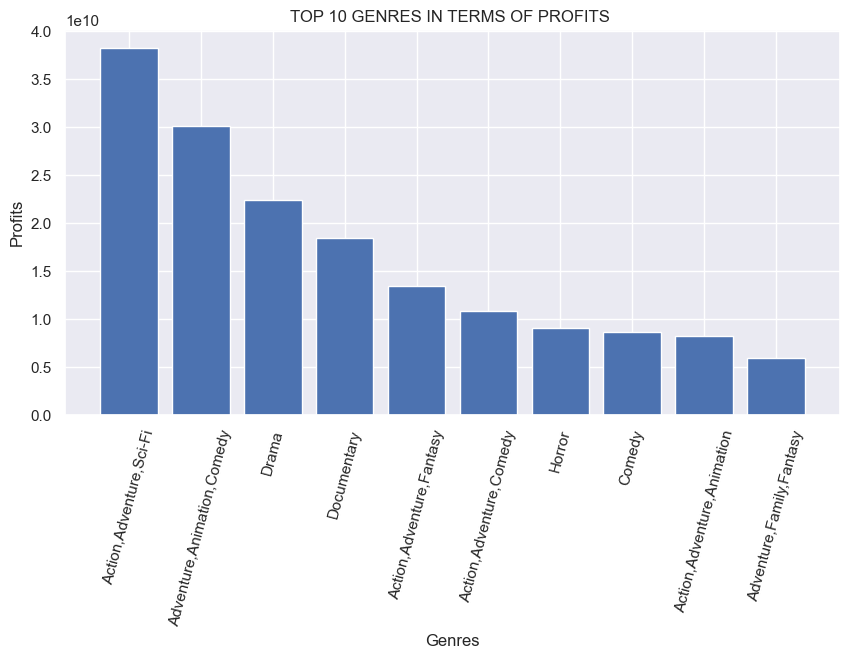

In [52]:
# Creating a bar graph from the data 
prof_fig,ax = plt.subplots(figsize = (10,5))
tb_len = np.arange(len(top_ten_profits))
ax.bar(top_ten_profits['genres'],top_ten_profits['Profits'])
ax.set_title('TOP 10 GENRES IN TERMS OF PROFITS ')
ax.set_xlabel('Genres')
ax.set_xticks(tb_len,top_ten_profits['genres'],rotation = 75)
ax.set_ylabel('Profits')
plt.show();

Films with action,adventure and sci-fi had the highest profits.
It is also noticeable that most adventure related films occur frequently in the list of genres with the highest profits.
These observations are as shown below.

In [53]:
top_ten_profits['genres']= top_ten_profits['genres'].map(lambda x:'Adventure' if 'Adventure' in x else x)
top_ten_profits

C:\Users\hp\AppData\Local\Temp\ipykernel_20304\4198380826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_profits['genres']= top_ten_profits['genres'].map(lambda x:'Adventure' if 'Adventure' in x else x)


,genres,Profits
0,Adventure,38212911587
1,Adventure,30064117830
2,Drama,22386474971
3,Documentary,18366636475
4,Adventure,13378056077
5,Adventure,10842475363
6,Horror,8974573887
7,Comedy,8588991819
8,Adventure,8142708440
9,Adventure,5913773695


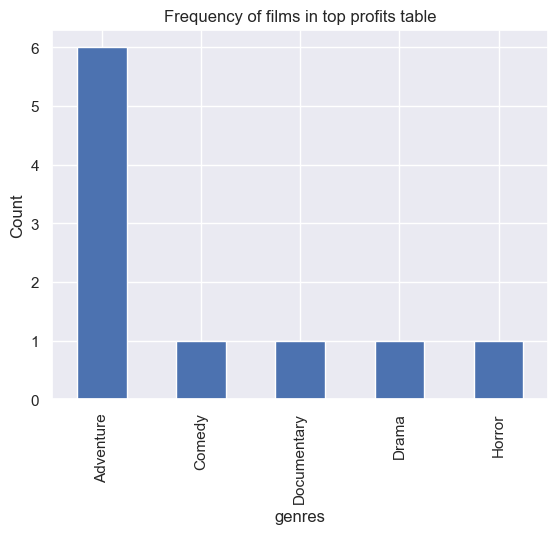

In [54]:
# Grouping the dataset
grouped_top10_profits = top_ten_profits.groupby('genres').count()
# Creating a bar graph to show the frequency
grouped_top10_profits.plot(kind ='bar',xlabel ='genres',ylabel ='Count',title ='Frequency of films in top profits table',legend =False);

For business purposes the head of  Microsoft's new movie studio should focus on adventure related films mainly,the action,adventure and sci-fi film that had the most profits.

### Investigating the relationship between budget and profit in filming

In order to determine whether spending more on films results in higher profits we will plot a scatter plot to visualize the correlation between the two columns (budget and profit columns).We will also perform mathematical computations.This will be done using the numbers_df dataframe.We will limit our investigation to only the movies with the highest profits.

In [55]:
# Exploring the columns in the dataset
numbers_df.head()

,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [56]:
# Sorting the numbers_df dataframe by profits
sorted_numbers_df = numbers_df.sort_values(by = 'Profits',ascending = False)
# Limiting to the top 20 films
top_20_df = sorted_numbers_df[:20].reset_index(drop = True)
top_20_df

,id,release_year,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009,Avatar,425000000,760507625,2776345279,3111852904
1,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2683973445
2,43,1997,Titanic,200000000,659363944,2208208395,2667572339
3,7,2018,Avengers: Infinity War,300000000,678815482,2048134200,2426949682
4,34,2015,Jurassic World,215000000,652270625,1648854864,2086125489
5,27,2012,The Avengers,225000000,623279547,1517935897,1916215444
6,42,2018,Black Panther,200000000,700059566,1348258224,1848317790
7,67,2015,Furious 7,190000000,353007020,1518722794,1681729814
8,44,2018,Incredibles 2,200000000,608581744,1242520711,1651102455
9,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [57]:
# Calculating the Pearsons correlation between budget and profits
np.corrcoef(top_20_df['production_budget'],top_20_df['Profits'])[0][1]

0.6696560623356885

The correlation is nearly high

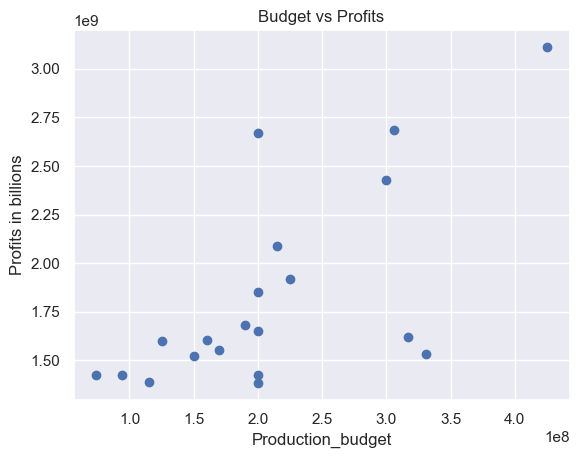

In [58]:
# Ploting to visualize the correlation
plt.scatter(top_20_df['production_budget'],top_20_df['Profits'])
plt.title('Budget vs Profits')
plt.xlabel('Production_budget')
plt.ylabel('Profits in billions')
plt.show();

It can be clearly seen that most films with the lowest budget have the lowest profits while those with a higher budget have the highest profits.It is wise to ensure that the budget is above 220 million dollars to increase the chances of getting much bigger profits.

### Determining the most appropriate length (runtime_minutes) of films

Taking a look into the grouped_trh table which was formed from the joined title_ratings and ratings_df in order to know the most appropriate length of films that Microsoft should be producing.This is the dataset containing films with votes above 1000.
- The dataset contains the top rated films.To find the most appropriate runtime of films,picking the runtime characteristics of these films is the best move.

In [59]:
# Taking a look at the dataframe
grouped_trh

,genres,averagerating,numvotes,start_year,runtime_minutes
0,"Animation,Documentary,Mystery",8.200000,1014.000000,2017.000000,93.000000
1,"Animation,Crime,Documentary",8.066667,2198.000000,2013.000000,74.666667
2,"Documentary,Sport,Thriller",7.900000,28979.000000,2017.000000,120.000000
3,"Biography,Documentary,Thriller",7.766667,16378.666667,2015.333333,100.333333
4,"Action,Documentary",7.711111,1453.333333,2014.000000,83.444444
5,"Animation,Drama,History",7.700000,2618.500000,2014.250000,121.250000
6,"Animation,Biography,Crime",7.550000,20011.000000,2015.500000,93.000000
7,"Comedy,Crime,Documentary",7.533333,19594.666667,2012.666667,84.333333
8,"Biography,Documentary,Mystery",7.520000,3335.400000,2012.800000,72.200000
9,"Adventure,Biography,Crime",7.500000,10950.333333,2014.333333,95.000000


In [60]:
# Filtering the dataset
grouped_trh_filtered = grouped_trh[['genres','runtime_minutes']]
grouped_trh_filtered

,genres,runtime_minutes
0,"Animation,Documentary,Mystery",93.000000
1,"Animation,Crime,Documentary",74.666667
2,"Documentary,Sport,Thriller",120.000000
3,"Biography,Documentary,Thriller",100.333333
4,"Action,Documentary",83.444444
5,"Animation,Drama,History",121.250000
6,"Animation,Biography,Crime",93.000000
7,"Comedy,Crime,Documentary",84.333333
8,"Biography,Documentary,Mystery",72.200000
9,"Adventure,Biography,Crime",95.000000


In [61]:
#  Finding the descriptive statistics of the runtime_column
grouped_trh_filtered['runtime_minutes'].describe()

count     10.000000
mean      93.722778
std       16.715884
min       72.200000
25%       83.666667
50%       93.000000
75%       99.000000
max      121.250000
Name: runtime_minutes, dtype: float64

The mean and median of the runtime_minutes from the top rated films is around 93 as shown above.

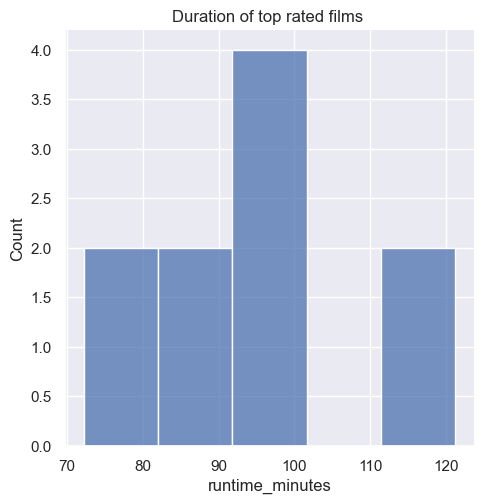

In [62]:
# Creating a ditribution plot to observe
sns.displot(grouped_trh_filtered['runtime_minutes']).set(title = 'Duration of top rated films ');

In [63]:
# Calculating the mode
grouped_trh_filtered['runtime_minutes'].mode()

0    93.0
Name: runtime_minutes, dtype: float64

Since most highly rated films have a runtime minutes of around 93 it would be wise to ensure that the length of films produced are around this value.

### Conclusions

- Films related to adventure have the highest profits with the film containing action,adventure and sci-fi getting the highest profits.
- Considering votes of above one thousand,documentary related films have the highest ratings.The film containing animation,documentary,mystery had the highest average rating.
- The most appropriate length (runtime) of films should be around 93 minutes.
- Most films having a budget of above 220 million dollars record profits higher than those having a lower budget.

## Recommendations

- The head of Microsoft's new movie studio should focus on adventure related films to realize more profits. A film containing action,adventure and sci-fi (science_fiction) is the most appropriate for this purpose.
- The head of Microsoft's new movie studio should create films that have a runtime minutes of around 93 minutes.
- If possible,the head of Microsoft's new movie studio should ensure the budget of films are above 220 million in order to increase the chances of getting higher profits.
The head of Microsoft's new movie studio should focus on films related to documentaries to gain higher film ratings specifically films containing animation,documentary,mystery which had the highest rating.